In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [10]:
base = pd.read_csv('Eleicao.csv', sep = ';')
base

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300
5,Susan Sanders,0,200
6,Anthony Harris,1,1800
7,Philip Richardson,1,1700
8,Eugene Phillips,0,300
9,Mildred Morris,1,1800


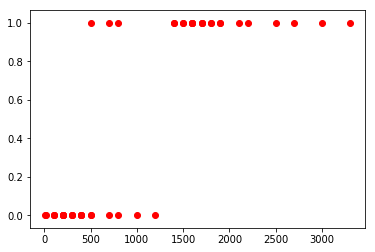

In [8]:
plt.scatter(base.DESPESAS, base.SITUACAO, color = 'red')

In [9]:
base.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


In [5]:
np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [12]:
X = base.iloc[:, 2].values
X = X[:, np.newaxis]   #adicionar uma nova coluna
y = base.iloc[:, 1].values

In [14]:
modelo = LogisticRegression()
modelo.fit(X, y)

C:\Users\Solange.NOTE-SOLANGE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
modelo.coef_
modelo.intercept_

array([-2.41847443])

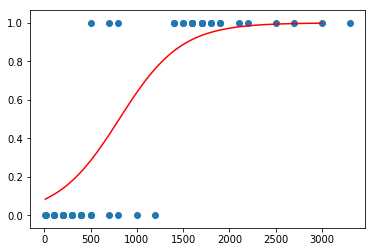

In [18]:
plt.scatter(X, y)
X_teste = np.linspace(10, 3000, 100) #vai gerar cem números aleatórios
def model(x):
    return 1 / (1 + np.exp(-x))
r = model(X_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(X_teste, r, color = 'red')

In [18]:
base_previsoes = pd.read_csv('NovosCandidatos.csv', sep = ';')
despesas = base_previsoes.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)
previsoes_teste = modelo.predict(despesas)
base_previsoes = np.column_stack((base_previsoes, previsoes_teste))
base

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300
5,Susan Sanders,0,200
6,Anthony Harris,1,1800
7,Philip Richardson,1,1700
8,Eugene Phillips,0,300
9,Mildred Morris,1,1800
